Gold nano-sphere
============================
*01/2021: updated to pyGDM v1.1+*

Comparing pyGDM to Mie theory for a gold nano-sphere (D=50nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Au_D50nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 1111/1111 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


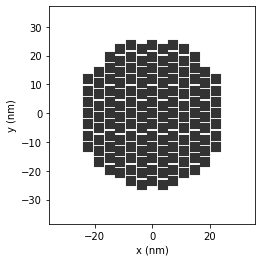

(hex) ----- N_dipoles = 1111

In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 30))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)


## --- Setup geometry (sphere D=50nm)
scale_factor = 1.38
step = 6.25/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.gold()

struct = structures.struct(step, geometry, material)

## --- Setup environment (vacuum)
n1, n2 = 1.0, 1.0     # vacuum env.
dyads = propagators.DyadsQuasistatic123(n1, n2)


sim = core.simulation(struct, efield, dyads)

visu.structure(sim)
print('(hex) ----- N_dipoles =', len(sim.struct.geometry), end='')

Run the simulation
--------------------------

In [3]:
## main simulation
sim.scatter()

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


timing for wl=300.00nm - setup: EE 13284.4ms, inv.: 4527.5ms, repropa.: 1862.3ms (1 field configs), tot: 19674.8ms
timing for wl=312.72nm - setup: EE 911.8ms, inv.: 6771.9ms, repropa.: 15.1ms (1 field configs), tot: 7702.6ms
timing for wl=325.97nm - setup: EE 258.5ms, inv.: 2074.0ms, repropa.: 23.3ms (1 field configs), tot: 2359.3ms
timing for wl=339.79nm - setup: EE 336.9ms, inv.: 1916.8ms, repropa.: 13.3ms (1 field configs), tot: 2267.6ms
timing for wl=354.20nm - setup: EE 243.4ms, inv.: 1510.4ms, repropa.: 12.4ms (1 field configs), tot: 1768.6ms
timing for wl=369.21nm - setup: EE 224.8ms, inv.: 1598.5ms, repropa.: 12.5ms (1 field configs), tot: 1836.4ms
timing for wl=384.86nm - setup: EE 234.6ms, inv.: 4438.9ms, repropa.: 23.8ms (1 field configs), tot: 4703.9ms
timing for wl=401.17nm - setup: EE 794.2ms, inv.: 4267.2ms, repropa.: 28.9ms (1 field configs), tot: 5091.8ms
timing for wl=418.18nm - setup: EE 771.5ms, inv.: 4049.0ms, repropa.: 32.7ms (1 field configs), tot: 4860.3ms
timin

Plot the spectrum
---------------------------

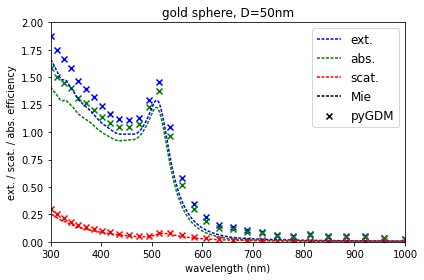

In [4]:
plt.figure()
plt.title("gold sphere, D=50nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 2] )


plt.tight_layout()
plt.show()

Except a slight offset in the extinction/absorption sections, the agreement with Mie theory is pretty nice. In particular, the plasmon resonance wavelength is reproduced with very good agreement.